# 지하철역과 행정구 연결

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 맷플롯립 한글 사용 가능
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 1. 데이터 읽기

In [3]:
stations_df = pd.read_csv('../4.Public_transportation/Subway_station_address.csv',
                          encoding="CP949")
stations_df.columns = ['line', 'station_name', 'old_address', 'new_address', 'phone_number']

### 2. 구 목록 생성

In [4]:
districts = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', 
    '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', 
    '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]

### 3. 구 추출 함수 정의

In [5]:
def extract_district(address):
    for district in districts:
        if district in address:
            return district
    return None

### 4. 구 추출 및 구 정보 사용

In [6]:
# 구주소와 도로명주소에서 구 추출
stations_df['district_from_old'] = stations_df['old_address'].apply(extract_district)
stations_df['district_from_new'] = stations_df['new_address'].apply(extract_district)

# 구주소와 도로명주소 중 하나라도 있는 구 정보 사용
stations_df['district'] = \
    stations_df['district_from_old'].combine_first(stations_df['district_from_new'])

# 구 확인
stations_df.info()
stations_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   line               289 non-null    object
 1   station_name       289 non-null    object
 2   old_address        289 non-null    object
 3   new_address        289 non-null    object
 4   phone_number       289 non-null    object
 5   district_from_old  274 non-null    object
 6   district_from_new  274 non-null    object
 7   district           274 non-null    object
dtypes: object(8)
memory usage: 18.2+ KB


Index(['line', 'station_name', 'old_address', 'new_address', 'phone_number',
       'district_from_old', 'district_from_new', 'district'],
      dtype='object')

### 5. 데이터 프레임 정리

In [7]:
stations_df = stations_df[['line', 'station_name', 'district']]
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line          289 non-null    object
 1   station_name  289 non-null    object
 2   district      274 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


### 6. 구 정보가 있는 역만 필터링 (경기도 제외)

In [8]:
seoul_stations_df = stations_df.dropna(subset=['district'])

### 7. 구별 지하철역 수 계산

In [9]:
station_counts = \
    seoul_stations_df.groupby('district').size().reindex(districts).fillna(0).astype('int8')

### 8. 결과 출력

In [10]:
print(f"\nTotal stations: {len(stations_df)}")
print(f"Seoul stations: {len(seoul_stations_df)}")
print(f"Excluded stations: {len(stations_df) - len(seoul_stations_df)}")

print("\nNumber of subway stations by district in Seoul:")
print(station_counts.sort_values(ascending=False))

seoul_stations_df.info(), stations_df.info()


Total stations: 289
Seoul stations: 274
Excluded stations: 15

Number of subway stations by district in Seoul:
district
송파구     28
중구      23
강남구     21
마포구     16
종로구     15
강동구     15
성동구     14
노원구     13
은평구     13
서초구     12
동작구     12
영등포구    11
광진구     11
용산구     10
강서구      9
성북구      9
중랑구      8
구로구      7
동대문구     6
양천구      5
서대문구     5
관악구      4
도봉구      3
강북구      3
금천구      1
dtype: int8
<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 288
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line          274 non-null    object
 1   station_name  274 non-null    object
 2   district      274 non-null    object
dtypes: object(3)
memory usage: 8.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line          289 non-null    object
 1   station_

(None, None)

### 9. 시각화

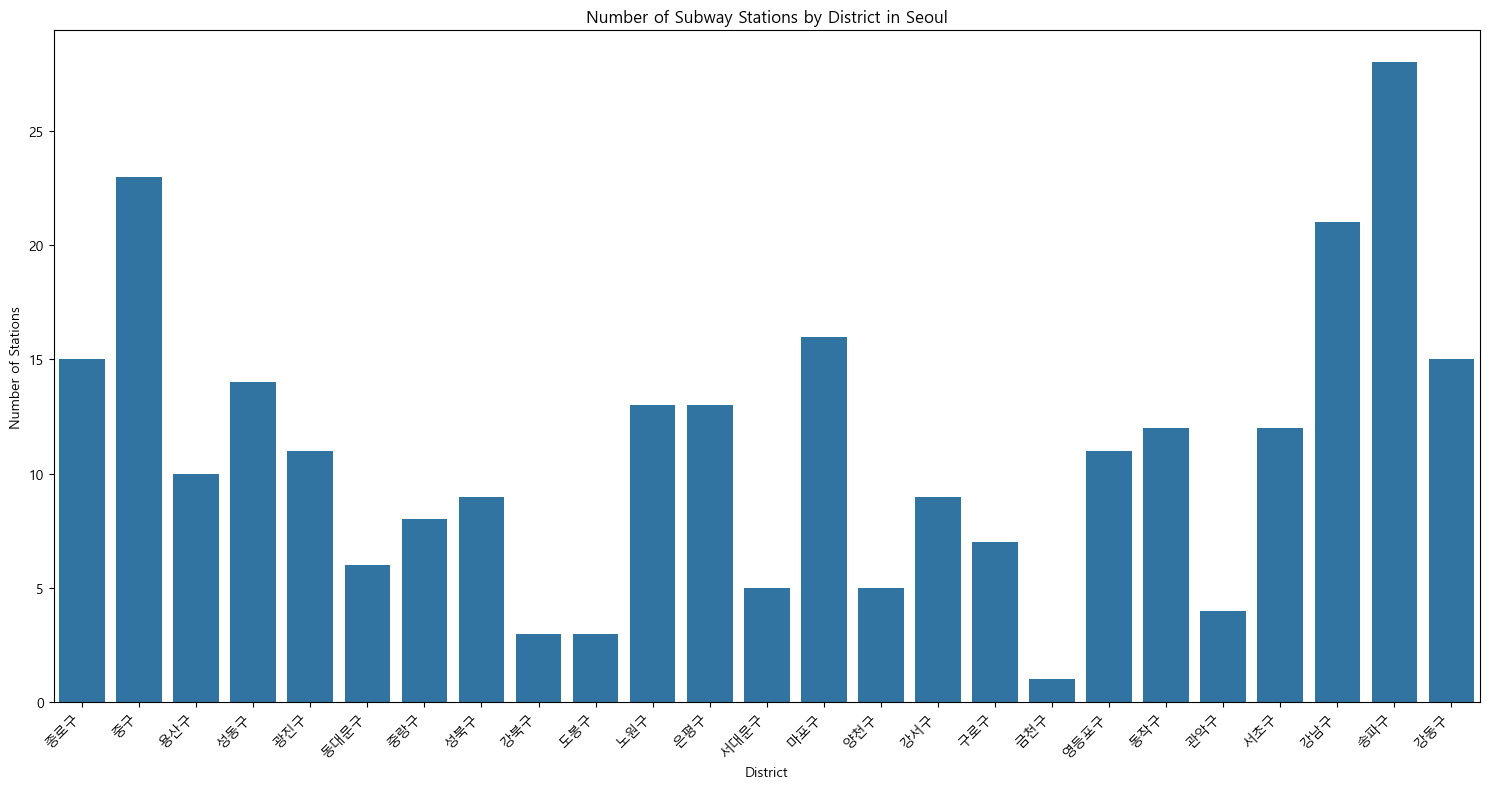

In [11]:
plt.figure(figsize=(15, 8))
sns.barplot(x=station_counts.index, y=station_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Subway Stations by District in Seoul')
plt.xlabel('District')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()

### 10. 제외된 역 확인

In [12]:
print("\nList of excluded stations:")
excluded_stations = stations_df[stations_df['district'].isna()]
print(excluded_stations[['line', 'station_name']])


List of excluded stations:
    line      station_name
60   3호선                지축
172  5호선                미사
173  5호선              하남풍산
174  5호선       하남시청(덕풍?신장)
175  5호선             하남검단산
215  7호선                장암
253  7호선                철산
254  7호선             광명사거리
269  8호선               남위례
270  8호선                산성
271  8호선  남한산성입구(성남법원?검찰청)
272  8호선             단대오거리
273  8호선                신흥
274  8호선                수진
275  8호선                모란


### 11. 결과저장

In [13]:
stations_df.info(), seoul_stations_df.info(), excluded_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line          289 non-null    object
 1   station_name  289 non-null    object
 2   district      274 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 288
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line          274 non-null    object
 1   station_name  274 non-null    object
 2   district      274 non-null    object
dtypes: object(3)
memory usage: 8.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 60 to 275
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line          15 non-null     object
 1   station_name  15 non-null     object
 2   district      0 non-null 

(None, None, None)

In [14]:
stations_df.to_csv("Data_Preprocessing/4_stations_total.csv", index=False)
seoul_stations_df.to_csv("Data_Preprocessing/4_seoul_stations.csv", index=False)
excluded_stations.to_csv("Data_Preprocessing/4_stations_outside_seoul.csv", index=False)